In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

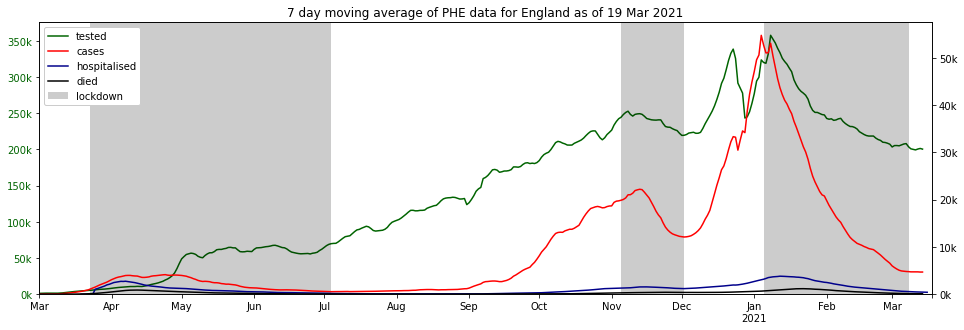

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

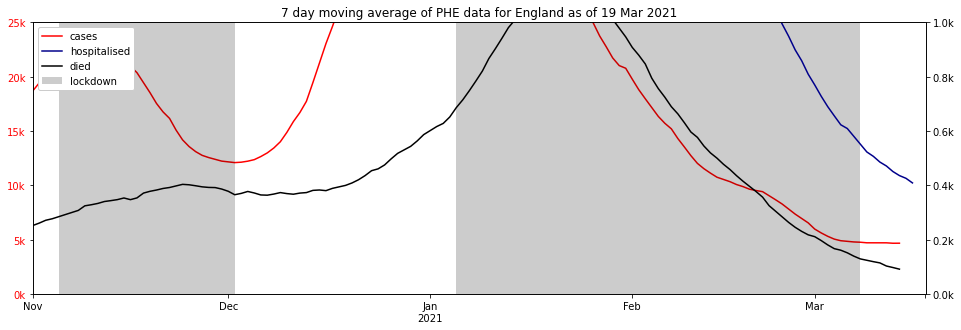

In [3]:
plot_summary(earliest_date='2020-11-01',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1419950.0,22337590.0,20917640.0,56286961,2.522698,37.162497,60.314805
1,Northern Ireland,N92000002,70709.0,655581.0,584872.0,1893667,3.733972,30.885684,65.380344
2,Scotland,S92000003,201435.0,2066460.0,1865025.0,5463300,3.687057,34.137335,62.175608
3,Wales,W92000004,318976.0,1204101.0,885125.0,3152879,10.116976,28.073548,61.809476


'partial: 26,263,732 (39.3%), full: 2,011,070'

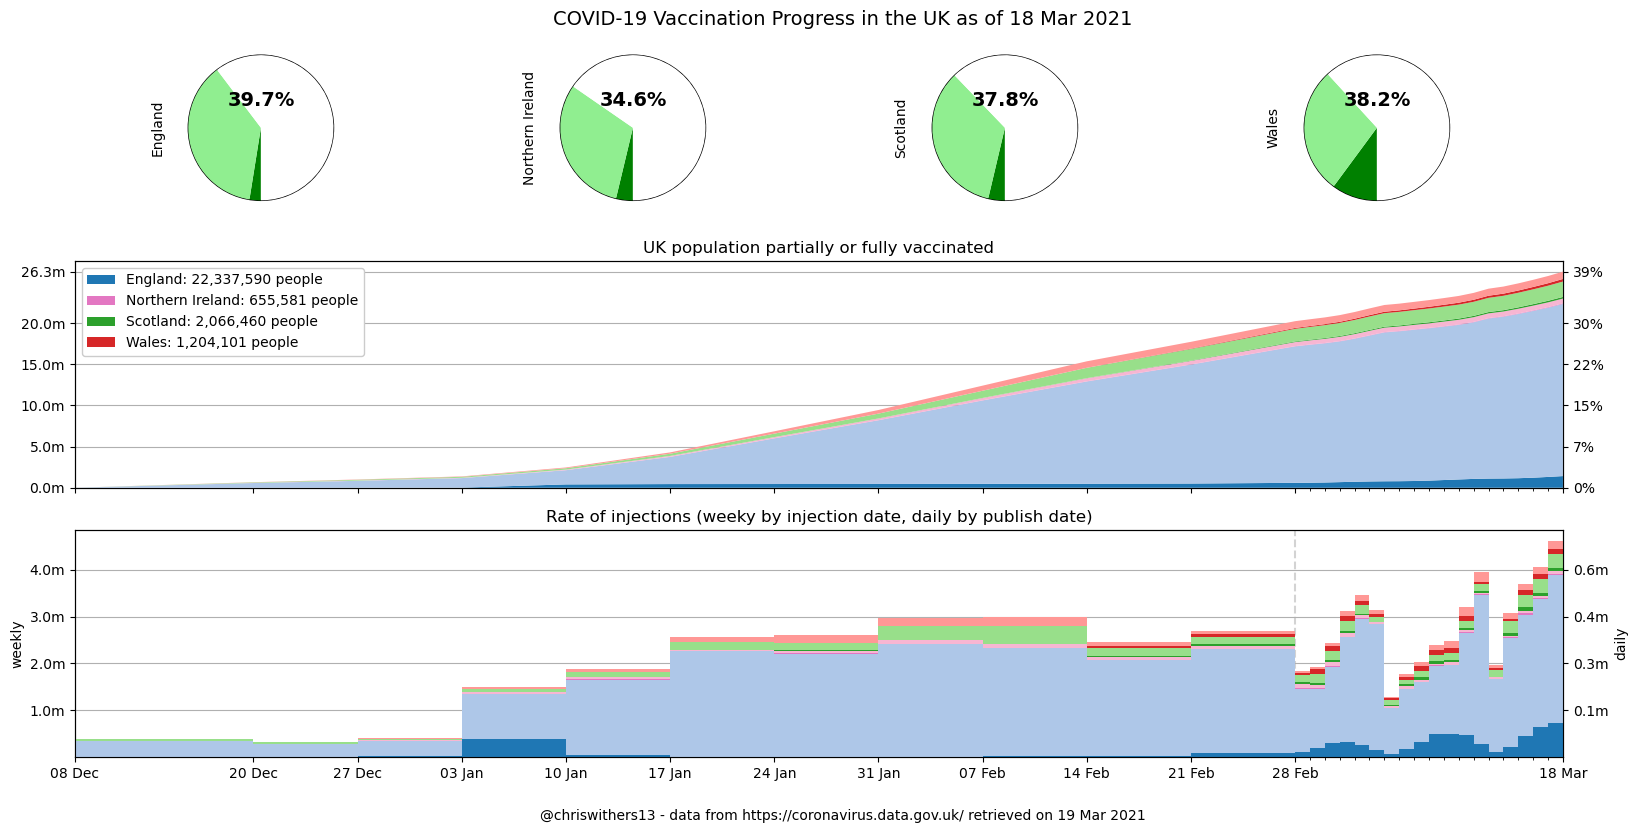

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,18 Mar 21,"+451,465","+104,609","+104,609","+22,337,590","+1,419,950","+1,419,950"
Northern Ireland,18 Mar 21,"+9,391","+3,507","+3,507","+655,581","+70,709","+70,709"
Scotland,18 Mar 21,"+43,458","+9,335","+9,335","+2,066,460","+201,435","+201,435"
Wales,18 Mar 21,"+23,946","+14,565","+14,565","+1,204,101","+318,976","+318,976"


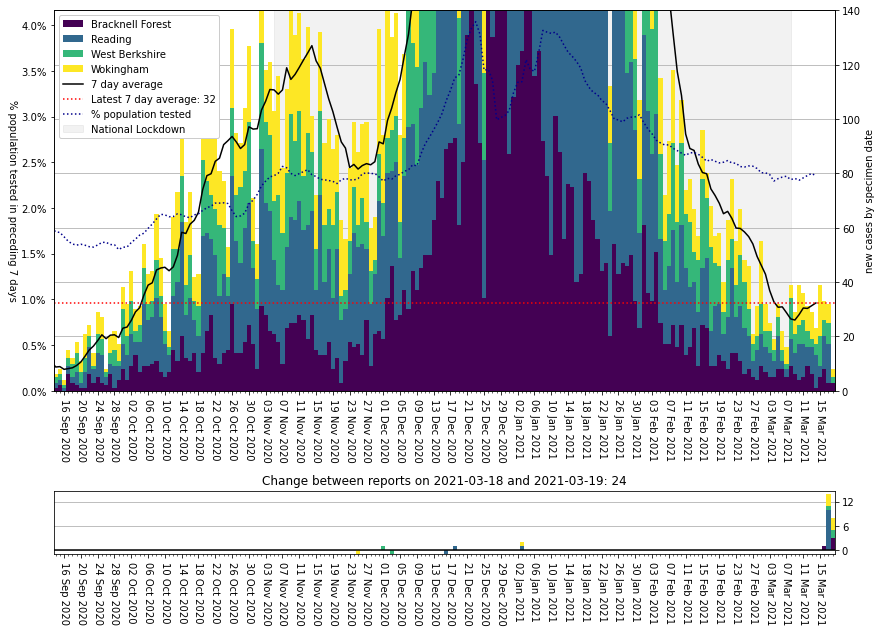

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

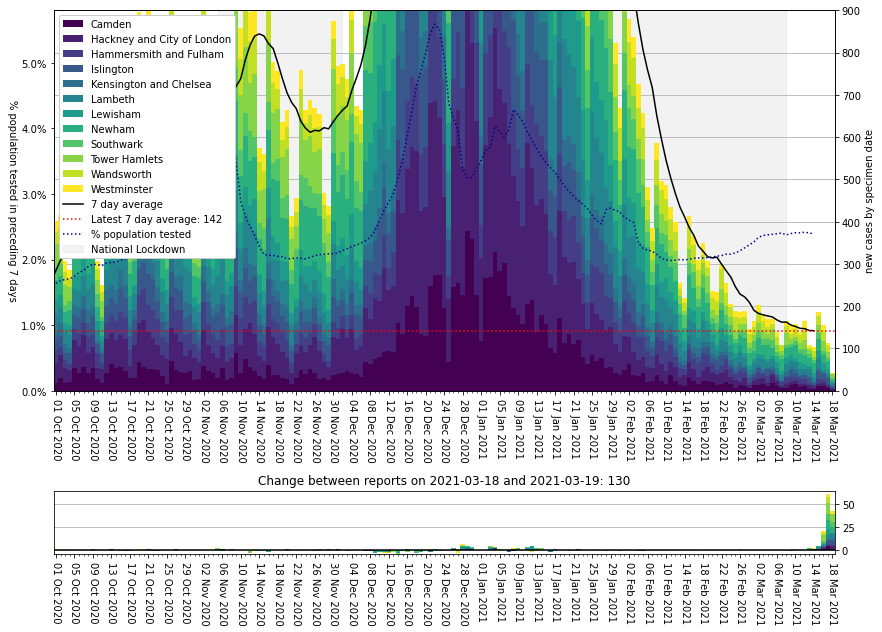

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000016,Barnsley,174.588643,431.0,2021-03-18
S12000040,West Lothian,165.483342,303.0,2021-03-18
E07000150,Corby,160.624775,116.0,2021-03-18
E07000236,Redditch,154.818733,132.0,2021-03-18
E06000010,"Kingston upon Hull, City of",138.579864,360.0,2021-03-18
E06000013,North Lincolnshire,134.655120,232.0,2021-03-18
E06000032,Luton,128.137732,273.0,2021-03-18
S12000011,East Renfrewshire,126.661782,121.0,2021-03-18
E08000018,Rotherham,126.596109,336.0,2021-03-18


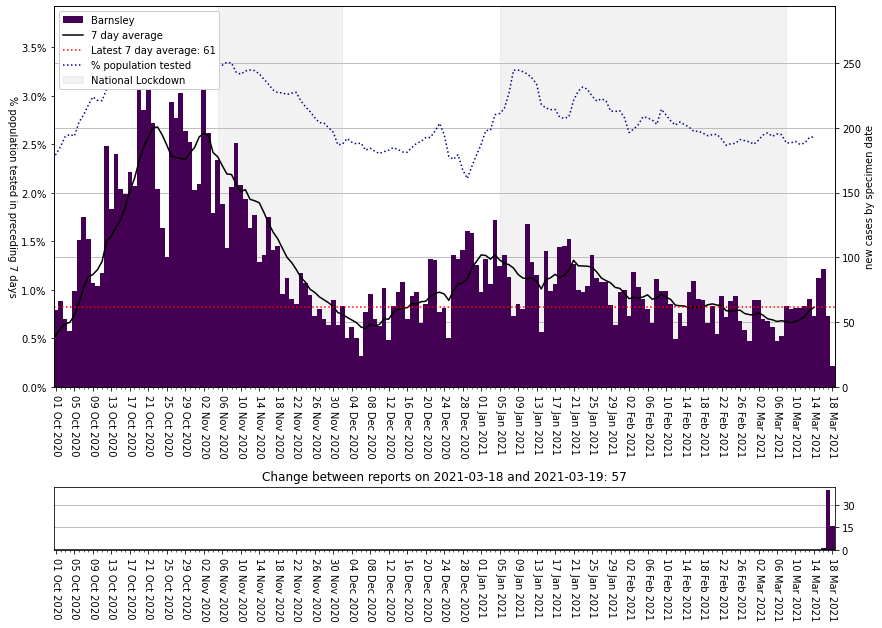

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,87.248263,692.0,2021-03-18
S12000049,Glasgow City,109.142027,691.0,2021-03-18
E08000025,Birmingham,58.503297,668.0,2021-03-18
E08000032,Bradford,118.011916,637.0,2021-03-18
E08000019,Sheffield,96.776455,566.0,2021-03-18
E08000016,Barnsley,174.588643,431.0,2021-03-18
E08000034,Kirklees,92.317417,406.0,2021-03-18
E08000003,Manchester,70.904283,392.0,2021-03-18
E08000036,Wakefield,106.513700,371.0,2021-03-18


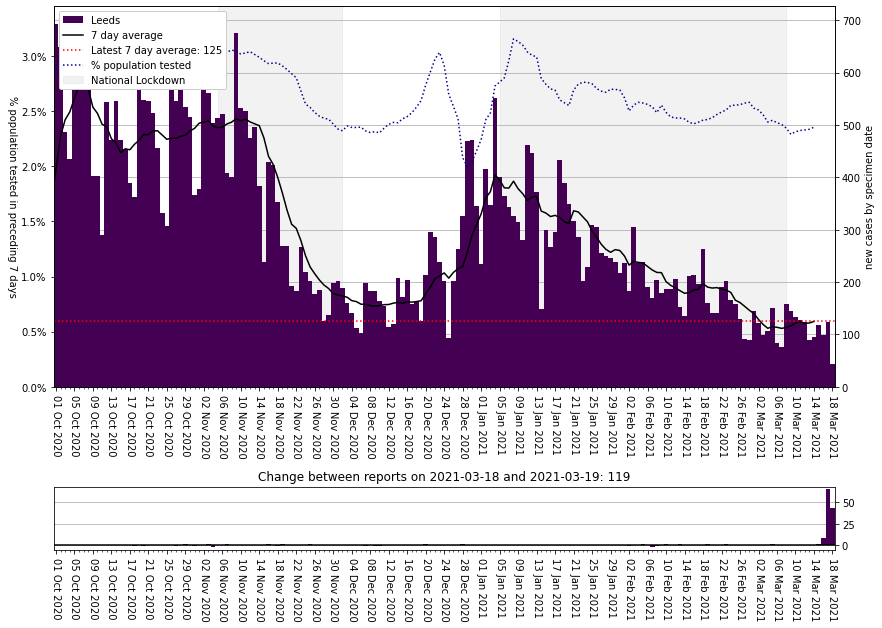

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

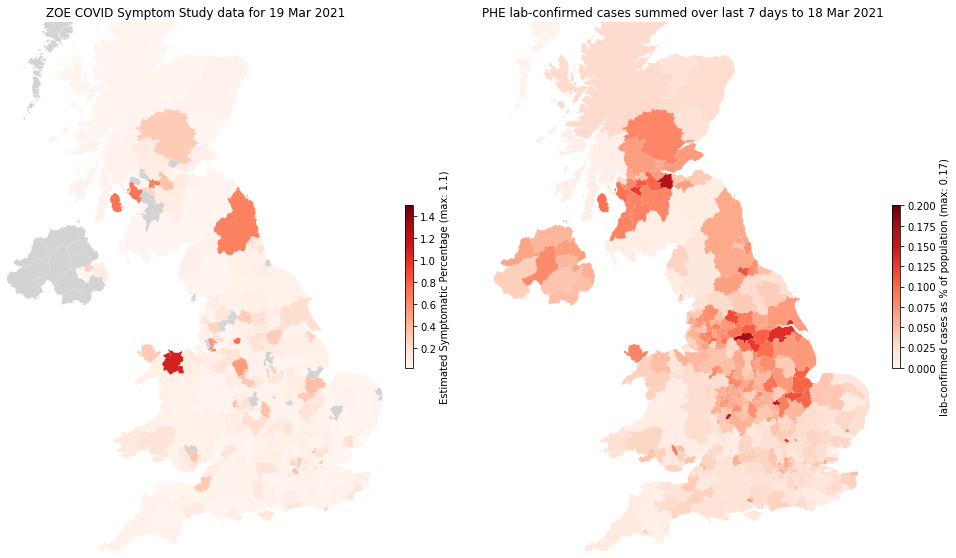

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

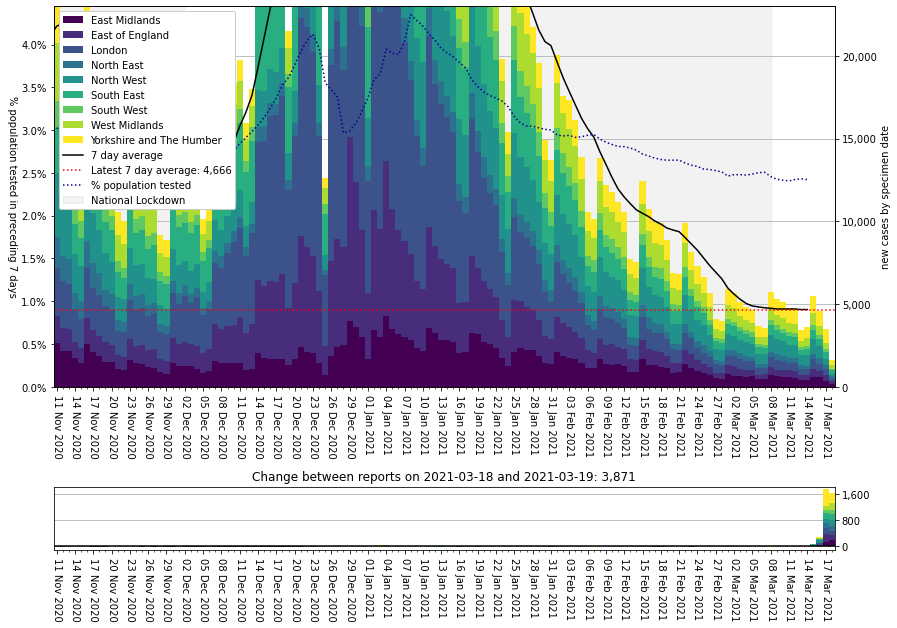

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

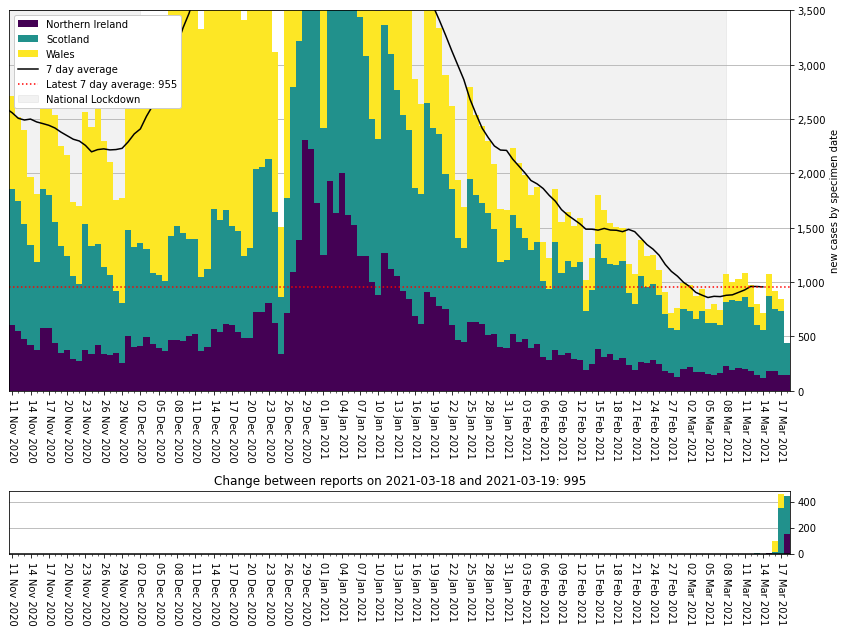

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')